<a href="https://colab.research.google.com/github/AnveshAnnepaga/AI_DS/blob/main/K_Means_and_Hierarchical_Clusttering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **K-Means Clustering**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Mall_Customers.csv")
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.isnull().sum()

,0
CustomerID,0
Genre,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [ ]:
X = df.iloc[:,3:].values


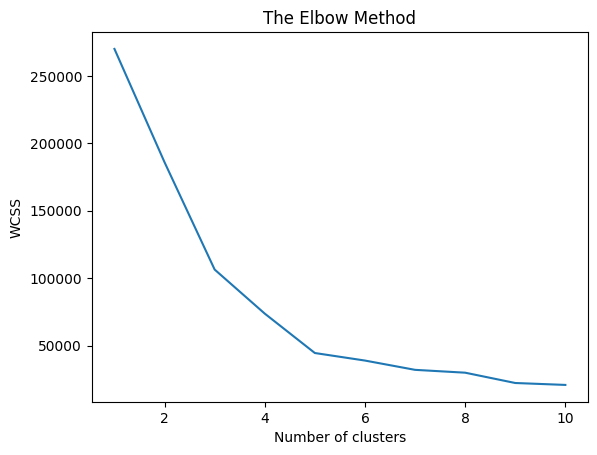

In [ ]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i,init='k-means++',random_state=0)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=5,init='k-means++',random_state=0)
y_kmeans = kmeans.fit_predict(X)

In [ ]:
y_kmeans

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 0,
       3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int32)

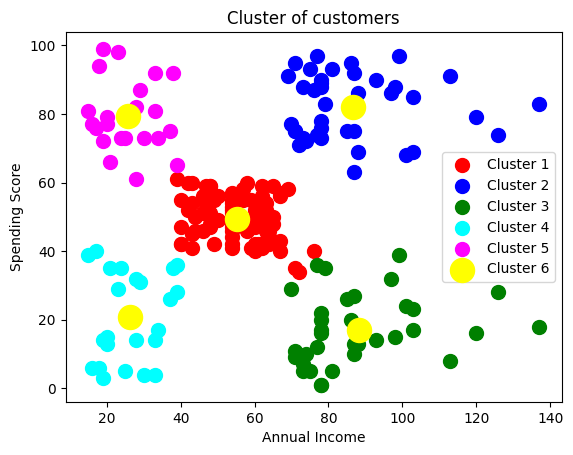

In [ ]:
plt.scatter(X[y_kmeans == 1,0],X[y_kmeans == 1,1],s=100,c='blue',label ='Cluster 2')
plt.scatter(X[y_kmeans == 2,0],X[y_kmeans == 2,1],s=100,c='green',label ='Cluster 3')
plt.scatter(X[y_kmeans == 3,0],X[y_kmeans == 3,1],s=100,c='cyan',label ='Cluster 4')
plt.scatter(X[y_kmeans == 0,0],X[y_kmeans == 0,1],s=100,c='red',label ='Cluster 1')
plt.scatter(X[y_kmeans == 4,0],X[y_kmeans == 4,1],s=100,c='magenta',label ='Cluster 5')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='yellow',label = 'Cluster 6')
plt.title("Cluster of customers")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.legend()
plt.show()

# **Wholesale Customer Segmentation Dashboard**

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Wholesale customers data.csv")

df.head()


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [ ]:
df.describe()


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [ ]:
X = df[[
    "Fresh",
    "Milk",
    "Grocery",
    "Frozen",
    "Detergents_Paper",
    "Delicassen"
]]


In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


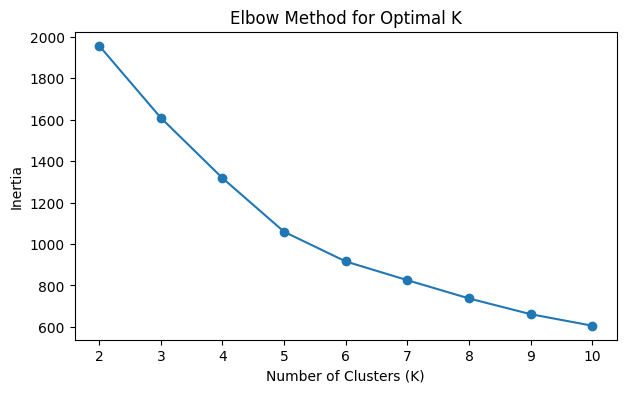

In [ ]:
inertia = []

K_range = range(2, 11)

for k in K_range:
    model = KMeans(n_clusters=k, random_state=42, n_init=10)
    model.fit(X_scaled)
    inertia.append(model.inertia_)

plt.figure(figsize=(7,4))
plt.plot(K_range, inertia, marker="o")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal K")
plt.show()


In [ ]:
for k in range(2, 7):
    model = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = model.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    print(f"K={k}, Silhouette Score={score:.3f}")


K=2, Silhouette Score=0.547
K=3, Silhouette Score=0.548
K=4, Silhouette Score=0.348
K=5, Silhouette Score=0.369
K=6, Silhouette Score=0.378


In [ ]:
k = 5
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(X_scaled)


In [ ]:
df["Cluster"].value_counts()


,count
Cluster,
0,270
3,96
2,63
1,10
4,1


In [ ]:
cluster_profile = df.groupby("Cluster")[[
    "Fresh",
    "Milk",
    "Grocery",
    "Frozen",
    "Detergents_Paper",
    "Delicassen"
]].mean()

cluster_profile


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Cluster,,,,,,
0,9092.155556,2967.759259,3807.411111,2271.759259,989.814815,978.962963
1,15964.900000,34708.500000,48536.900000,3054.600000,24875.200000,2942.800000
2,32957.984127,4997.349206,5884.761905,8422.841270,954.603175,2462.968254
3,5754.166667,10866.604167,16607.104167,1464.125000,7202.875000,1813.385417
4,36847.000000,43950.000000,20170.000000,36534.000000,239.000000,47943.000000


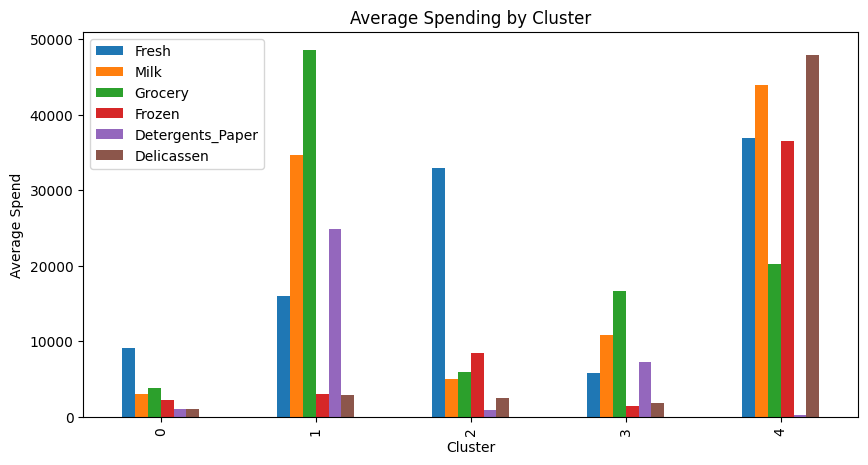

In [ ]:
cluster_profile.plot(kind="bar", figsize=(10,5))
plt.title("Average Spending by Cluster")
plt.ylabel("Average Spend")
plt.show()


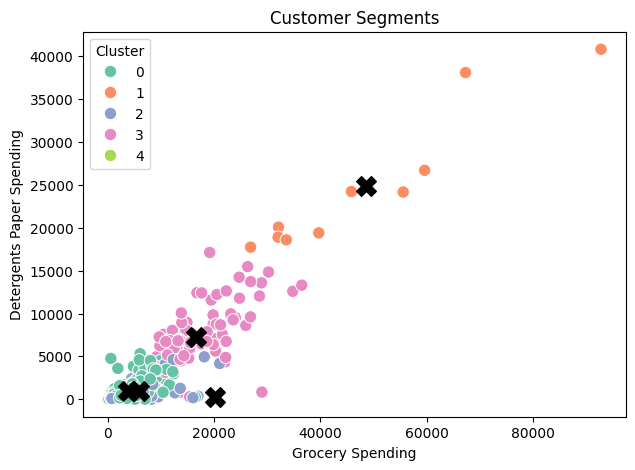

In [ ]:
plt.figure(figsize=(7,5))
sns.scatterplot(
    x=df["Grocery"],
    y=df["Detergents_Paper"],
    hue=df["Cluster"],
    palette="Set2",
    s=80
)

centers = scaler.inverse_transform(kmeans.cluster_centers_)

plt.scatter(
    centers[:, 2],  # Grocery
    centers[:, 4],  # Detergents_Paper
    c="black",
    s=200,
    marker="X"
)

plt.xlabel("Grocery Spending")
plt.ylabel("Detergents Paper Spending")
plt.title("Customer Segments")
plt.show()


In [ ]:
kmeans_2 = KMeans(n_clusters=3, random_state=99, n_init=10)
labels_2 = kmeans_2.fit_predict(X_scaled)

np.mean(df["Cluster"] == labels_2)


np.float64(0.6136363636363636)

# **Hierarchical** **Clusterring**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Mall_Customers.csv")
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.isnull().sum()

,0
CustomerID,0
Genre,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [ ]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
x= df.iloc[:,3:].values
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

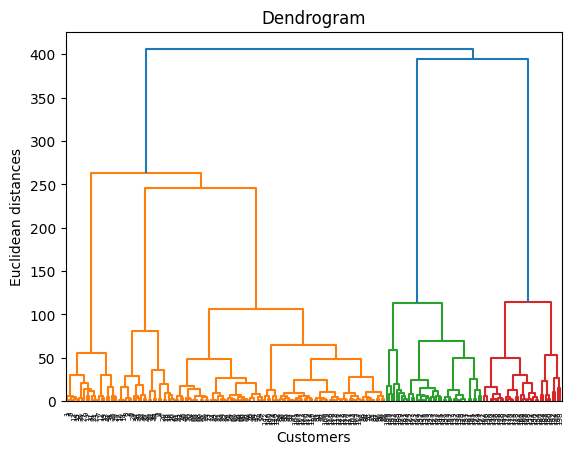

In [ ]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(x,method='ward'))
plt.title("Dendrogram")
plt.xlabel("Customers")
plt.ylabel("Euclidean distances")
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=5,metric='euclidean',linkage='ward')
y_hc = hc.fit_predict(x)
y_hc

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

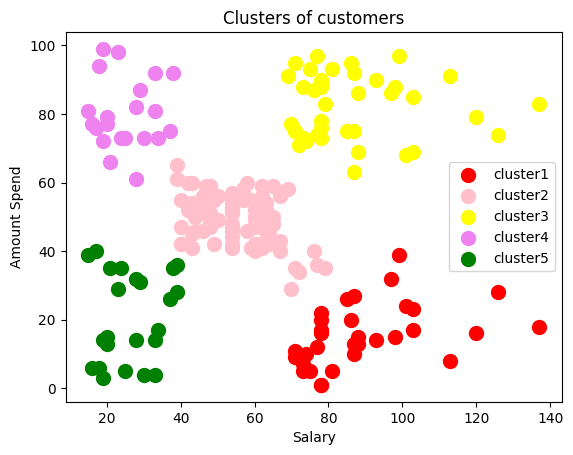

In [ ]:
plt.scatter(x[y_hc ==0,0],x[y_hc==0,1],s=100,c='red',label='cluster1')
plt.scatter(x[y_hc ==1,0],x[y_hc==1,1],s=100,c='pink',label='cluster2')
plt.scatter(x[y_hc ==2,0],x[y_hc==2,1],s=100,c='yellow',label='cluster3')
plt.scatter(x[y_hc ==3,0],x[y_hc==3,1],s=100,c='violet',label='cluster4')
plt.scatter(x[y_hc ==4,0],x[y_hc==4,1],s=100,c='green',label='cluster5')
plt.xlabel('Salary')
plt.ylabel('Amount Spend')
plt.title('Clusters of customers')
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import silhouette_score
score = silhouette_score(x,y_hc)
score

np.float64(0.5529945955148897)

# all-data.csv

In [ ]:
import numpy as np,
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/all-data.csv",encoding="latin1")
df.head()

,neutral,"According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing ."
0,neutral,Technopolis plans to develop in stages an area...
1,negative,The international electronic industry company ...
2,positive,With the new production plant the company woul...
3,positive,According to the company 's updated strategy f...
4,positive,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...


In [ ]:
df.isnull().sum()

,0
neutral,0
"According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .",0


In [ ]:
df.columns = ["label", "text"]
df.isnull().sum()

,0
label,0
text,0


In [ ]:
import re
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # remove numbers & punctuation
    text = re.sub(r'\s+', ' ', text).strip()
    return text

df["text"] = df["text"].astype(str).apply(clean_text)

In [ ]:
df.head()

,label,text
0,neutral,technopolis plans to develop in stages an area...
1,negative,the international electronic industry company ...
2,positive,with the new production plant the company woul...
3,positive,according to the company s updated strategy fo...
4,positive,financing of aspocomp s growth aspocomp is agg...


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(
    max_features=1000,
    stop_words='english',
    ngram_range=(1,2)   # unigrams + bigrams
)
X = tfidf.fit_transform(df["text"])

print("TF-IDF Shape:", X.shape)

TF-IDF Shape: (4845, 1000)


In [ ]:
sample_size = 300
X_sample = X[:sample_size]

In [ ]:
from scipy.cluster.hierarchy import linkage

# Convert sparse to dense
X_sample_dense = X_sample.toarray()

# Create linkage matrix
Z = linkage(X_sample_dense, method='ward')


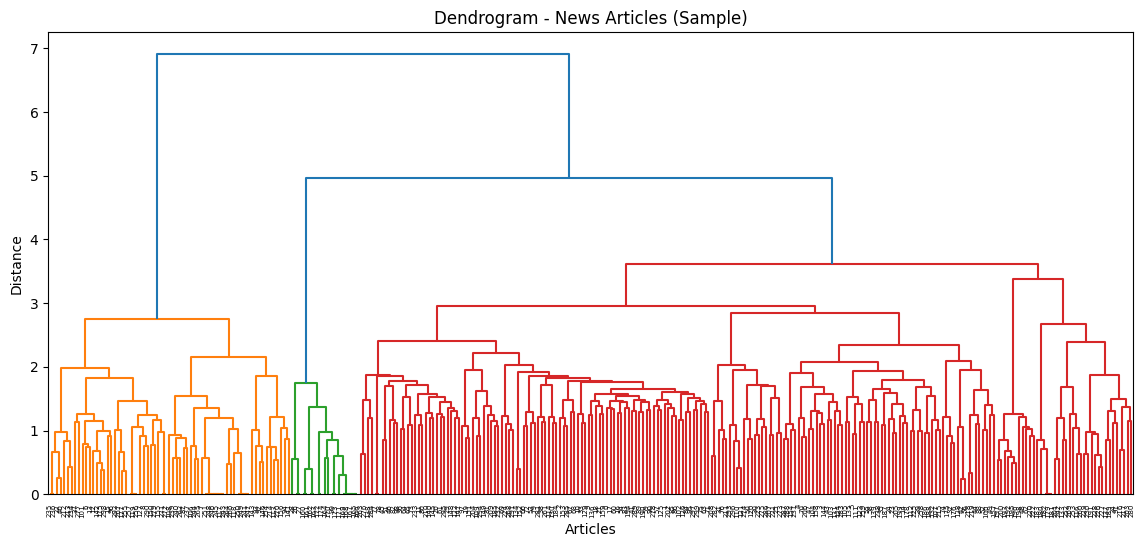

In [ ]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram

plt.figure(figsize=(14,6))
dendrogram(Z)
plt.title("Dendrogram - News Articles (Sample)")
plt.xlabel("Articles")
plt.ylabel("Distance")
plt.show()


In [ ]:
from sklearn.cluster import AgglomerativeClustering

n_clusters = 3

agg = AgglomerativeClustering(
    n_clusters=n_clusters,
    linkage='ward'
)

clusters = agg.fit_predict(X_sample_dense)

print("Cluster Counts:")
import numpy as np
print(np.bincount(clusters))


Cluster Counts:
[214  67  19]


In [ ]:
from sklearn.metrics import silhouette_score

sil_score = silhouette_score(X_sample_dense, clusters)
print("Silhouette Score:", sil_score)


Silhouette Score: 0.07449260361873797
